In [77]:
import seaborn as sns
import networkx as nx
import pandas as pd
import freeman as fm

# Funções:

In [78]:
def load(inDegree):
    g = fm.load('./NetworkBuilder/network.gml')

    removed = []
    for n, m in g.edges:
        if g.in_degree(n) <= inDegree:
            removed.append((n, m))
    for n, m in removed:
        g.remove_edge(n, m)

    # Remover todos os nós que ficaram isolados depois da
    # remoção das arestas, para melhorar a visualização.
    removed = []
    for n in g.nodes:
        if not g.degree(n):
            removed.append(n)
    for n in removed:
        g.remove_node(n)

    return g

In [79]:
def draw(g):
    # Deixar os nós menores e fazer os nomes deles
    # aparecer apenas quando o mouse passa por cima.
    g.set_all_nodes(size=10, labpos='hover')

    # Deixar as arestas semi-transparentes para
    # a visualização ficar um pouco mais leve.
    g.set_all_edges(color=(0, 0, 0, 0.25))

    # Usar um algoritmo especial para posicionar
    # os nós de acordo com grupos.
    g.move('kamada_kawai')

    g.draw()

In [80]:
def getCentralization(centrality, c_type):

    c_denominator = float(1)

    n_val = float(len(centrality))

    print(str(len(centrality)) + "," +  c_type + "\n")

    if (c_type=="degree"):
        c_denominator = (n_val-1)*(n_val-2)

    if (c_type=="close"):
        c_top = (n_val-1)*(n_val-2)
        c_bottom = (2*n_val)-3	
        c_denominator = float(c_top/c_bottom)

    if (c_type=="between"):
        c_denominator = (n_val*n_val*(n_val-2))

    if (c_type=="eigen"):

        '''
        M = nx.to_scipy_sparse_matrix(G, nodelist=G.nodes(),weight='weight',dtype=float)
        eigenvalue, eigenvector = linalg.eigs(M.T, k=1, which='LR') 
        largest = eigenvector.flatten().real
        norm = sp.sign(largest.sum())*sp.linalg.norm(largest)
        centrality = dict(zip(G,map(float,largest)))
        '''

        c_denominator = sqrt(2)/2 * (n_val - 2)
        
        
        

    #start calculations	

    c_node_max = max(centrality.values())


    c_sorted = sorted(centrality.values(),reverse=True)
    


    print ("max node" + str(c_node_max) + "\n")

    c_numerator = 0

    for value in c_sorted:

        if c_type == "degree":
            #remove normalisation for each value
            c_numerator += (c_node_max*(n_val-1) - value*(n_val-1))
        else:
            c_numerator += (c_node_max - value)

    print ('numerator:' + str(c_numerator)  + "\n")	
    print ('denominator:' + str(c_denominator)  + "\n")	

    network_centrality = float(c_numerator/c_denominator)

    if c_type == "between":
        network_centrality = network_centrality * 2

    return network_centrality

# Início da análise:

In [81]:
g = fm.load('./NetworkBuilder/network.gml')

In [82]:
data = pd.DataFrame({
    'wallet': list(g.nodes),
    'indegree': [g.in_degree(n) for n in g.nodes],
    'outdegree': [g.out_degree(n) for n in g.nodes],
})

In [83]:
data

wallet  indegree  outdegree
0           0         0          2
1           1         0          1
2           2         0          2
3           3         1          0
4           4         2          0
...       ...       ...        ...
48903   48903         0          2
48904   48904         1          0
48905   48905         0          2
48906   48906         1          2
48907   48907         1          0

[48908 rows x 3 columns]

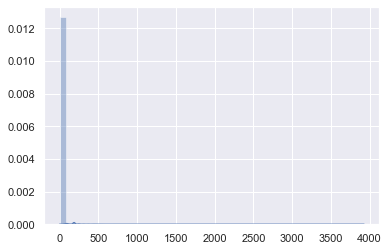

In [84]:
sns.distplot([g.in_degree(n) for n in g.nodes]);

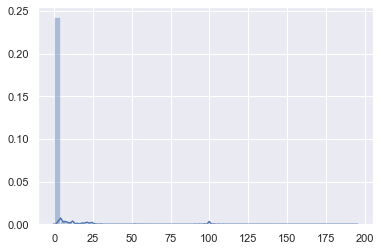

In [85]:
sns.distplot([g.out_degree(n) for n in g.nodes]);

Realizamos um filtro dos nós que possuem um in degree de 0, para conseguirmos visualizar a rede

In [86]:
g = load(0)

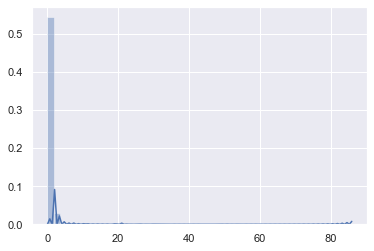

In [88]:
sns.distplot([g.in_degree(n) for n in g.nodes]);

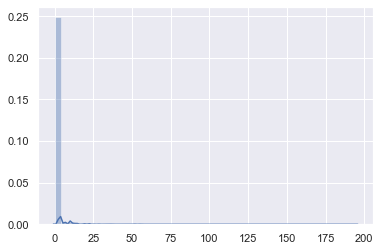

In [89]:
sns.distplot([g.out_degree(n) for n in g.nodes]);

In [90]:
BETWEENNESS_CENTRALITY = nx.betweenness_centrality(g)

In [91]:
getCentralization(BETWEENNESS_CENTRALITY, "between")

8073,between

max node0.0005214499316583164

numerator:4.207286125403556

denominator:526013938359.0



1.599686175058015e-11

In [92]:
g = fm.load('./NetworkBuilder/network.gml')
BETWEENNESS_CENTRALITY = nx.betweenness_centrality(g)
getCentralization(BETWEENNESS_CENTRALITY, "between")

KeyboardInterrupt: 

# Regressão

In [95]:
centralidades = []

for e in range(1, 11):
    print(e)
    g = fm.load('./NetworkBuilder/network'+str(e)+'.gml')
    BETWEENNESS_CENTRALITY = nx.betweenness_centrality(g)
    centralidades.append(getCentralization(BETWEENNESS_CENTRALITY, "between"))
    
print(centralidades)

1
6569,between

max node5.865706934999807e-06

numerator:0.03818563622378595

denominator:283377614487.0

2
6616,between

max node0.0005048499929488309

numerator:3.3394797814294175

denominator:289504409984.0

3
2929,between

max node2.3919938914310143e-05

numerator:0.07001097750172323

denominator:25110853007.0

4
206,between

max node0.0

numerator:0.0

denominator:8656944.0

5
5390,between

max node7.990099990590968e-06

numerator:0.043027790532092304

denominator:156532714800.0

6
6303,between

max node3.2234585584864573e-06

numerator:0.020224104912293844

denominator:250324924509.0

7
6001,between

max node0.0003651719731066289

numerator:2.190876979496543

denominator:216035993999.0

8
6439,between

max node7.963050288399964e-07

numerator:0.0051152945920795515

denominator:266882661077.0

9
5777,between

max node4.0112242328308805e-05

numerator:0.23167251262125294

denominator:192733284975.0

10
5267,between

max node5.6410184274470896e-05

numerator:0.29701549007791056

den

In [96]:
centralidades

[2.6950354771610035e-13,
 2.3070320632518032e-11,
 5.576152867623151e-12,
 0.0,
 5.497609951640895e-13,
 1.6158283041101424e-13,
 2.0282518102114816e-11,
 3.833365997953464e-14,
 2.404073719298707e-12,
 4.0670928085086195e-12]

In [97]:
volatilidade = []
for e in range(1, 11):
    volatilidade.append(0.001813281291)
    


In [98]:
import statsmodels.api as sm


# Primeiro parâmetro: Y
# Segundo parâmetro: X1, ..., Xn (não esqueça os colchetes duplos)
model = sm.OLS(volatilidade, centralidades)
result = model.fit()
result.summary()

/Users/luvi/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1450: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=10



<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.319
Model:                            OLS   Adj. R-squared (uncentered):              0.243
Method:                 Least Squares   F-statistic:                              4.218
Date:                Mon, 26 Oct 2020   Prob (F-statistic):                      0.0702
Time:                        23:08:45   Log-Likelihood:                          50.859
No. Observations:                  10   AIC:                                     -99.72
Df Residuals:                       9   BIC:                                     -99.41
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          1.026e+08   4.99e+07      2.054      0.070   -1.04e+07    2.16e+08
==============================================================================
Omnibus:                        6.144   Durbin-Watson:                   0.790
Prob(Omnibus):                  0.046   Jarque-Bera (JB):                3.067
Skew:                          -1.356   Prob(JB):                        0.216
Kurtosis:                       3.095   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.97e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""